Programación para *Data Science*
============================

Unidad 5: Adquisición de datos en Python
--------------------------------------

En este Notebook encontraréis un conjunto de ejercicios para practicar. Estos ejercicios no puntúan para la PEC, pero os recomendamos que los intentís resolver como parte del proceso de aprendizaje. Encontraréis ejemplos de posibles soluciones a los ejercicios en el propio notebook, pero es importante que intentéis resolverlos vosotros antes de consultar las soluciones. Las soluciones os permitirán validar vuestras respuestas, así como ver alternativas de resolución de las actividades. También os animamos a preguntar cualquier duda que surja sobre la resolución de las actividades para practicar en el foro del aula.

----
## Preguntas y ejercicios para practicar


### Ejercicio 1 
Programad una función que retorne el estado meteorológico actual en una cierta localización, definida por su código postal (**zip code**) y código de país (e.g: us, uk, es, fr, etc). La función debe devolver una lista de tuplas de dos elementos, correspondientes al resumen del estado actual del tiempo **(weather.main)** y a la descripción extendida **(weather.description)**. Utilizad la API de [openweathermap](https://openweathermap.org/api) para obtener las predicciones.

Para utilizar la API necesitaréis registraros y obtener una API key. Podéis registraros [aquí](https://home.openweathermap.org/users/sign_up) y obtener vuestra API key [aquí](https://home.openweathermap.org/api_keys) una vez registrados. Tened en cuenta que la API key puede tardar un rato en funcionar después de registraros, y la API os devolverá un error 401 conforme la clave no es válida:

`{"cod":401, "message": "Invalid API key. Please see http://openweathermap.org/faq#error401 for more info."}`

Simplemente esperad un rato antes de utilizar la clave.

**Hints**: 

- Veréis que en general la API está documentada sin incluir la API key, aunque esta es necesaria. Deberéis incluir la API key en la llamada como uno de los parámetros de la URL (&appid=your_api_key):

    http://example_url.com?param1=value1&param2=value2&appid=your_api_key
    

- Os animamos a que paséis por el proceso de registro para que veáis de qué trata y cómo se generan las API keys. Aún así, os proporcionamos una API key en caso de que tengáis problemas con el proceso.

    owm_api_key = 'd54f26dbcf6d4136bc0ef8ba5f07825b'

**Respuesta**

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

In [1]:
import json

# Define la función 'json_print', que tiene un parámetro obligatorio 'json_data' y un parámetro opcional limit
# y no devuelve ningún valor.
# La función muestra por pantalla el contenido de la variable 'json_data' en formato JSON, limitando el número 
# de líneas a mostrar si se incluye el parámetro limit.
def json_print(json_data, limit=None):
    if isinstance(json_data, (str)):
        json_data = json.loads(json_data)
    nice = json.dumps(json_data, sort_keys=True, indent=3, separators=(',', ': '))
    print("\n".join(nice.split("\n")[0:limit]))
    if limit is not None:
        print("[...]")


In [2]:
import requests

def weather(zip, pais='es'):
    api_key = '3caa6467619598914a16c17657756614' # BaltiB 
    res = requests.get('http://api.openweathermap.org/data/2.5/weather?zip='+str(zip)+
                       ','+pais+'&units=metric&APPID='+api_key)
    if (res.status_code!=200):
        print(res.status_code)
        print(dict(res.headers),'\n')
        json_print(str(res.text))
        return res.status_code
    else:
        res_dict = dict(json.loads(res.text))
        #print(res_dict['weather'][0]['main'],res_dict['weather'][0]['description'],'\n')
        return [('weather.main', res_dict['weather'][0]['main']),
                ('weather.description', res_dict['weather'][0]['description'])]

print(weather(43003))

[('weather.main', 'Clouds'), ('weather.description', 'scattered clouds')]


### Ejercicio 2
[Scimago Journal](https://www.scimagojr.com/journalrank.php) es una web para consultar la información de las principales revistas de la comunidad científica. Programad un crawler que devuelva el código y la área de todas las revistas que se muestran en la web.  Utilizad la estructura de crawler que hemos visto en el Notebook de esta unidad modificando únicamente dos líneas de código:

- URL de inicio.
- La expresión XPath que selecciona el contenido a capturar.

**Nota**: si la ejecución del _crawler_ os devuelve un error `ReactorNotRestartable`, reiniciad el núcleo del Notebook (en el menú: `Kernel` - `Restart`)

**Respuesta**

In [1]:
# Importamos scrapy.
import scrapy
from scrapy.crawler import CrawlerProcess

# Creamos la araña.
class uoc_spider(scrapy.Spider):
    
    # Asignamos un nombre a la araña.
    name = "uoc_spider"
    
    custom_settings = {
        'FEED_FORMAT': 'csv',
        'FEED_URI': 'uoc_spyder.csv'
    }

    # Indicamos la url que queremos analizar en primer lugar.
    start_urls = [
        "https://www.scimagojr.com/journalrank.php"
    ]

    # Definimos el analizador.
    def parse(self, response):
        # Extraemos el título del grado.
        for grado in response.xpath('/html/body/div[@class="ranking_body"]/div[@class="table_wrap"]/table/tbody/tr/td[@class="tit"]/a/text()'):
            yield {
                'title': grado.extract()
            }

In [2]:
if __name__ == "__main__":

    # Creamos un crawler.
    process = CrawlerProcess({
        'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)',
        'DOWNLOAD_HANDLERS': {'s3': None},
        'LOG_ENABLED': True
    })

    # Inicializamos el crawler con nuestra araña.
    process.crawl(uoc_spider)
    
    # Lanzamos la araña.
    process.start()

2020-04-29 09:51:01 [scrapy.utils.log] INFO: Scrapy 1.7.3 started (bot: scrapybot)
2020-04-29 09:51:01 [scrapy.utils.log] INFO: Versions: lxml 4.4.0.0, libxml2 2.9.9, cssselect 1.0.3, parsel 1.5.1, w3lib 1.20.0, Twisted 19.2.1, Python 3.6.8 (default, Jan 14 2019, 11:02:34) - [GCC 8.0.1 20180414 (experimental) [trunk revision 259383]], pyOpenSSL 19.0.0 (OpenSSL 1.1.1  11 Sep 2018), cryptography 2.1.4, Platform Linux-4.15.0-55-generic-x86_64-with-Ubuntu-18.04-bionic
2020-04-29 09:51:01 [scrapy.crawler] INFO: Overridden settings: {'FEED_FORMAT': 'csv', 'FEED_URI': 'uoc_spyder.csv', 'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}
2020-04-29 09:51:02 [scrapy.extensions.telnet] INFO: Telnet Password: 6946d3004c5e283a
2020-04-29 09:51:02 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.feedexport.FeedExporter',
 'scrapy.extensions

2020-04-29 09:51:03 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.scimagojr.com/journalrank.php>
{'title': 'Nature Biotechnology'}
2020-04-29 09:51:03 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.scimagojr.com/journalrank.php>
{'title': 'Review of Economic Studies'}
2020-04-29 09:51:03 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.scimagojr.com/journalrank.php>
{'title': 'American Economic Journal: Macroeconomics'}
2020-04-29 09:51:03 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.scimagojr.com/journalrank.php>
{'title': 'Journal of Financial Economics'}
2020-04-29 09:51:03 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.scimagojr.com/journalrank.php>
{'title': 'Journal of Labor Economics'}
2020-04-29 09:51:03 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.scimagojr.com/journalrank.php>
{'title': 'Administrative Science Quarterly'}
2020-04-29 09:51:03 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.sc

### Ejercicio 3

Implementad un conjunto de funciones para obtener la **secuencia de ADN** del organismo *Homo sapiens* del cromosoma 1 (**chr1**) desde la posición 100000 hasta 101000 para la referencia **hg19**.  Para realizar el ejercicio utilizad la API de [UCSC](https://genome.ucsc.edu/goldenPath/help/api.html).

**Nota**: El genoma de referencia de una célula es un repositorio de secuencias de ADN ( ácido desoxirribonucleico) empaquetado en forma de cromosoma. El ADN es un ácido nucleico que contiene la información genética que dirige el desarrollo y el funcionamiento de todos los seres vivos. El ADN se puede entender como una secuencia de nucleótidos (A, C, T y G) de una determinada longitud.  Este material hereditario codifica los genes que, una vez descifrados, son indispensables para la síntesis de las proteínas. 

Un genoma de referencia es la representación de la secuencia de ADN del genoma de una especie.  En el caso del organismo *Homo sapiens*, existen diferentes versiones del genoma de referencia.  La última versión, hg38, se publicó en el 2014 y es la más detallada y precisa.

UCSC es un navegador de la Universidad de Santa Cruz de California que ofrece acceso a secuencias genómicas y su correspondiente anotación (genes, mRNAs, CpG,…) de una gran variedad de organismos, vertebrados e invertebrados. 

Referencia: [Genómica Computacional](http://discovery.uoc.edu/iii/encore/record/C__Rb1046448__Sgenomica%20Computacional__Orightresult__U__X7?lang=cat&suite=def). Enrique Blanco. Barcelona, Universitat Oberta de Catalunya, 2011.

**Importante**: No es necesario entender toda la información que podéis obtener a través de la API de UCSC. Fijaros bien con lo que os pide el enunciado ( prestad atención a la palabras clave en negrita), y revisad los ejemplos de acceso a los datos que hay en la web de [UCSC](https://genome.ucsc.edu/goldenPath/help/api.html).


**Respuesta**

In [4]:
res = requests.get('http://api.genome.ucsc.edu/getData/sequence?genome=hg19;chrom=chr1;start=100000;end=101000')
print(json.loads(res.text)['dna'])

actaagcacacagagaataatgtctagaatctgagtgccatgttatcaaattgtactgagactcttgcagtcacacaggctgacatgtaagcatcgccatgcctagtacagactctccctgcagatgaaattatatgggatgctaaattataatgagaacaatgtttggtgagccaaaactacaacaagggaagctaattggatgaatttataaaaatatgcctcagccaaaatagcttaattcactctcccttatcataaggataatcttgcctaaagggacagtaatattAAAGACACTAGGAATAACCTCTGTACTTTGGACAGTAGACCTGCATAGCCCattaggcctcaatgaagtcttatgcaagaccagaagccaatttgccatttaaggtgattctccatgtttctgctctaaCTGTGCTTCACAATACTCAAAACACTAAATCAGGATGTTTCCTGGAGTTCAGGGAGCTGTCCGTGTTACTGAGCAGTTCTCAGCAACACAAAGATCCTACTGACTCCTCATCAGACTTCTTTCTCACTGGAATTTTACACCTGGGCTGTTAACACCAGGCCAGGTCAAATTCAAAGGAGAGAAAAAAGCTCATTATGAAGGGTAAAATCCAAAACACTGTGCATAAAGATATGGCACAATTTTTATACATAAAGATTTCATAAAACCAAAGCATCAGGAAATGAAAAGAGATACAGAAAGAAAAATGATGGTAAATGAGACATTAATTTACCCTTCTAATCTCTATCACAGCAAAAAGATAATTAAAAAATCTATATGAGGACCACAAAATACACAAAAATTATGTAGCAAAGCCTATAGCCTGAAAAAGTAAACATTGAAATTTGTATGTCCATAAAATGTTTACAAAATTCAGTACATATTACACACCCCACCCTAAAAACATCTAAGCAAAGTAGAGAATGTAGAAATGCTACAGATTATATTCTCTGATTATGACACAACAAAACTAGAAATTAC

In [11]:
type(res)

requests.models.Response

### Ejercicio 4

La [NASA](https://www.nasa.gov) mediante su [API](https://api.nasa.gov) publica cada día una imagen de astronomía.  Implementad una función para descargar y visualizar la imagen dentro del notebook.

**Respuesta**

In [6]:
res = requests.get('https://api.nasa.gov/planetary/apod?api_key=bQJQycsl4rnab8n2uUFZrDGszZb8t2GlteAsMcOO')

https://apod.nasa.gov/apod/image/2004/CometSwan_Rhemann_1200.jpg


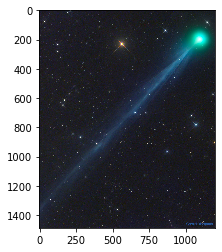

In [10]:
print(json.loads(res.text)['hdurl'])
res1 = requests.get(json.loads(res.text)['hdurl'], stream=True)
img = Image.open(res1.raw)

plt.imshow(img)
plt.show()

### Ejercicio 5

Queremos conocer la Agenda de actos de  la Anella Olímpica de la ciudad de Barcelona.  Imprimid por pantalla el nombre del grupo o cantante que celebrará un concierto en la Anella Olímpica durante el año 2020.  Para realizar el ejercicio, consultad el portal de datos abiertos del Ayuntamiento de Barcelona mediante la siguiente [url](https://opendata-ajuntament.barcelona.cat/es/).  Primero tenéis que identificar qué métode utilizar para descargar los datos. Seguidamente, descargad los datos y procesarlos para responder la pregunta. 

**Respuesta**

In [27]:
with open('data/actosanella.json') as f:
  data = json.load(f)
 

In [32]:
#print(json.dumps(data, indent = 4, sort_keys=True))
for d in data['actes']['acte']:
    print(d['name'])

Bon Iver
Fangoria
Pablo López
Dua Lipa
Maldita Nerea
David Bisbal
Carlos Sadness
Werq the World - Ru Paul's Drag Race
Beret
Manuel Carrasco
Paul McCartney
OT 2020
Camila Cabello
Alicia Keys
Iron Maiden
Tash Sultana
Doctor Queen
Morat
Maluma
Elton John 2/10/2020
The 1975
Elton John 3/10/2020
Helloween
Alanis Morissette
Leiva
Dani Martín
Dani Martín
Natos y Waor
Niall Horan
Nil Moliner
Bad Gyal
Alejandro Fernández
Buhos


---

##  Soluciones ejercicios para practicar

### Ejercicio 1 
Programad una función que retorne el estado meteorológico actual en una cierta localización, definida por su código postal (**zip code**) y código de país (e.g: us, uk, es, fr, etc). La función debe devolver una lista de tuplas de dos elementos, correspondientes al resumen del estado actual del tiempo **(weather.main)** y a la descripción extendida **(weather.description)**. Utilizad la API de [openweathermap](https://openweathermap.org/api) para obtener las predicciones.

Para utilizar la API necesitareis registraros y obtener una API key. Podéis registraros [aquí](https://home.openweathermap.org/users/sign_up) y obtener vuestra API key [aquí](https://home.openweathermap.org/api_keys) una vez registrados. Tened en cuenta que la API key puede tardar un rato en funcionar después de registraros, y la API os devolverá un error 401 conforme la clave no es valida:

`{"cod":401, "message": "Invalid API key. Please see http://openweathermap.org/faq#error401 for more info."}`

Simplemente esperad un rato antes de utilizar la clave.

**Hints**: 

- Veréis que en general la API esta documentada sin incluir la API key, aun que esta es necesaria. Deberéis incluir la API key en la llamada como uno de los parámetros de la URL (&appid=your_api_key):

    http://example_url.com?param1=value1&param2=value2&appid=your_api_key

- Os animamos a que paséis por el proceso de registro para que veáis de que trata y cómo se generan las API keys. Aún así, os proporcionamos una API key en caso de que tengáis problemas con el proceso.

    owm_api_key = 'd54f26dbcf6d4136bc0ef8ba5f07825b'

**Respuesta**

Lo primero que haremos será revisar la API de openweathermap para identificar qué endpoints nos pueden ser útiles.  El enunciado nos pide devolver el estado meteorológico actual dado un código postal, podemos utilizar https://openweathermap.org/current.

Existe un método que nos devuelve el estado meteorológico a partir del código postal y el código del país separado por coma:

api.openweathermap.org/data/2.5/weather?zip=zip_code,country_code


In [33]:
import json
import requests
def parse_response(response):
    data = None
    if response.status_code == 200:
        # Data is formatted as JSON but received as string. Load it as JSON object
        data = json.loads(response.content)        
    
    # Raise an error otherwise    
    else:
        raise Exception("Unexpected response (%s: %s)." %(response.status_code, response.reason))
    
    return data


def get_weather_zip(zip_code, country, api_key):
    # Query the data from the API
    base_url = 'http://api.openweathermap.org/data/2.5/weather?zip=%s,%s&appid=%s'
    
    # We also add the API KEY to the request
    response = requests.get(base_url % (zip_code, country, api_key))
    
    # Check the response code and act accordingly
    data = parse_response(response)
    
    # If the data was properly processed
    if data:
        weather = data.get('weather')
        r = [(w.get('main'), w.get('description')) for w in weather]
    else:
        raise Exception("Couldn't get weather data.")
    
    return r
        
api_key = '169af185292dd6119b14bc20d23400fb'
zip_code = '08018'
country_code = 'es'
weather_data = get_weather_zip(zip_code, country_code, api_key)

print (weather_data)

[('Clouds', 'few clouds')]


### Ejercicio 2

[Scimago Journal](https://www.scimagojr.com/journalrank.php) es una web para consultar la información de las principales revistas de la comunidad científica. Programad un crawler que devuelva el código y la área de todas las revistas que se muestran en la web.  Utilizad la estructura de crawler que hemos visto en el Notebook de esta unidad modificando únicamente dos líneas de código:

- URL de inicio.
- La expresión XPath que selecciona el contenido a capturar.

**Nota**: si la ejecución del _crawler_ os devuelve un error `ReactorNotRestartable`, reiniciad el núcleo del Notebook (en el menú: `Kernel` - `Restart`)

**Respuesta**

In [12]:

import scrapy
from scrapy.crawler import CrawlerProcess

# Creamos la aranya.
class journal_spider(scrapy.Spider):
    # Asignamos un nombre a la aranya.
    name = "journal_spider"
    
    # Indicamos la URL que queremos analitza.
    # URL de inicio:
    ################################################
    start_urls = [
        "https://www.scimagojr.com/journalrank.php"
    ]
    ################################################
    
    # Definimos el analitzador.
    def parse(self, response):
        # Extraemos código y área de las revistas.
        # Expresión 'xpath' que nos devuelve los nombres de las monedas
    ################################################
        for data  in response.xpath('//div//*//a')[7:34]:
            
            
        ################################################
            yield {
                'data':data.extract()
            }
if __name__ == "__main__":
    
    # Creamos un crawler.
    process = CrawlerProcess({
        'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)',
        'DOWNLOAD_HANDLERS': {'s3': None},
        'LOG_ENABLED': True
    })
    
    # Inicializamos el crawler con la aranya.
    process.crawl(journal_spider)
    
    # Lanzamos la aranya.
    process.start()



2020-05-01 17:45:52 [scrapy.utils.log] INFO: Scrapy 1.7.3 started (bot: scrapybot)
2020-05-01 17:45:52 [scrapy.utils.log] INFO: Versions: lxml 4.4.0.0, libxml2 2.9.9, cssselect 1.0.3, parsel 1.5.1, w3lib 1.20.0, Twisted 19.2.1, Python 3.6.8 (default, Jan 14 2019, 11:02:34) - [GCC 8.0.1 20180414 (experimental) [trunk revision 259383]], pyOpenSSL 19.0.0 (OpenSSL 1.1.1  11 Sep 2018), cryptography 2.1.4, Platform Linux-4.15.0-55-generic-x86_64-with-Ubuntu-18.04-bionic
2020-05-01 17:45:52 [scrapy.crawler] INFO: Overridden settings: {'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}
2020-05-01 17:45:52 [scrapy.extensions.telnet] INFO: Telnet Password: 1cd39833dc81768f
2020-05-01 17:45:52 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.logstats.LogStats']
2020-05-01 17:45:55 [scrapy.middleware] INFO: Enabled downloader middlewares:

2020-05-01 17:45:57 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.scimagojr.com/journalrank.php>
{'data': '<a href="journalrank.php?area=3400" class="dropdown-element" data-code="3400">Veterinary</a>'}
2020-05-01 17:45:57 [scrapy.core.engine] INFO: Closing spider (finished)
2020-05-01 17:45:57 [scrapy.statscollectors] INFO: Dumping Scrapy stats:
{'downloader/request_bytes': 247,
 'downloader/request_count': 1,
 'downloader/request_method_count/GET': 1,
 'downloader/response_bytes': 95179,
 'downloader/response_count': 1,
 'downloader/response_status_count/200': 1,
 'elapsed_time_seconds': 1.49505,
 'finish_reason': 'finished',
 'finish_time': datetime.datetime(2020, 5, 1, 15, 45, 57, 52009),
 'item_scraped_count': 27,
 'log_count/DEBUG': 28,
 'log_count/INFO': 10,
 'memusage/max': 88850432,
 'memusage/startup': 88850432,
 'response_received_count': 1,
 'scheduler/dequeued': 1,
 'scheduler/dequeued/memory': 1,
 'scheduler/enqueued': 1,
 'scheduler/enqueued/memory': 1,
 'sta

### Ejercicio 3

Implementad un conjunto de funciones para obtener la **secuencia de ADN** del organismo *Homo sapiens* del cromosoma 1 (**chr1**) desde la posición 100000 hasta 101000 para la referencia **hg19**.  Para realizar el ejercicio utilizad la API de [UCSC](https://genome.ucsc.edu/goldenPath/help/api.html). 
**Nota**: El genoma de referencia de una célula es un repositorio de secuencias de ADN ( ácido desoxirribonucleico) empaquetado en forma de cromosoma. El ADN es un ácido nucleico que contiene la información genética que dirige el desarrollo y el funcionamiento de todos los seres vivos. El ADN se puede entender como una secuencia de nucleótidos (A, C, T y G) de una determinada longitud.  Este material hereditario codifica los genes que, una vez descifrados, son indispensables para la síntesis de las proteínas. 

Un genoma de referencia es la representación de la secuencia de ADN del genoma de una especie.  En el caso del organismo *Homo sapiens*, existen diferentes versiones del genoma de referencia.  La última versión, hg38, se publicó en el 2014 y es la más detallada y precisa.

UCSC es un navegador de la Universidad de Santa Cruz de California que ofrece acceso a secuencias genómicas y su correspondiente anotación (genes, mRNAs, CpG,…) de una gran variedad de organismos, vertebrados e invertebrados. 

Referencia: [Genómica Computacional](http://discovery.uoc.edu/iii/encore/record/C__Rb1046448__Sgenomica%20Computacional__Orightresult__U__X7?lang=cat&suite=def). Enrique Blanco. Barcelona, Universitat Oberta de Catalunya, 2011.

**Importante**: No es necesario entender toda la información que podéis obtener a través de la API de UCSC. Fijaros bien con lo que os pide el enunciado ( prestad atención a la palabras clave en negrita), y revisad los ejemplos de acceso a los datos que hay en la web de [UCSC](https://genome.ucsc.edu/goldenPath/help/api.html).



**Respuesta**

In [35]:
import requests
import json

def parse_response(response):
    data = None
    if response.status_code == 200:
        # Data is formatted as JSON but received as string. Load it as JSON object
        data = json.loads(response.content)        
    
    # Raise an error otherwise    
    else:
        raise Exception("Unexpected response (%s: %s)." %(response.status_code, response.reason))
    
    return data


def get_sequence_UCSC(genome_ref, chrom, start, end):
    # Query the data from the API
    base_url='http://api.genome.ucsc.edu/getData/sequence?genome=%s;chrom=%s;start=%s;end=%s'
    
    response = requests.get(base_url % (genome_ref, chrom, start, end))
    
    # Check the response code and act accordingly
    data = parse_response(response)
    
    if data:
        
     dna = data.get('dna')
    
    return (dna)
    
genome_ref = 'hg19'
chrom = 'chr1'
start='100000'
end='101000'
sequence_data = get_sequence_UCSC(genome_ref, chrom, start,end)

print (sequence_data)

2020-04-29 17:47:23 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): api.genome.ucsc.edu
2020-04-29 17:47:25 [urllib3.connectionpool] DEBUG: http://api.genome.ucsc.edu:80 "GET /getData/sequence?genome=hg19;chrom=chr1;start=100000;end=101000 HTTP/1.1" 200 507


actaagcacacagagaataatgtctagaatctgagtgccatgttatcaaattgtactgagactcttgcagtcacacaggctgacatgtaagcatcgccatgcctagtacagactctccctgcagatgaaattatatgggatgctaaattataatgagaacaatgtttggtgagccaaaactacaacaagggaagctaattggatgaatttataaaaatatgcctcagccaaaatagcttaattcactctcccttatcataaggataatcttgcctaaagggacagtaatattAAAGACACTAGGAATAACCTCTGTACTTTGGACAGTAGACCTGCATAGCCCattaggcctcaatgaagtcttatgcaagaccagaagccaatttgccatttaaggtgattctccatgtttctgctctaaCTGTGCTTCACAATACTCAAAACACTAAATCAGGATGTTTCCTGGAGTTCAGGGAGCTGTCCGTGTTACTGAGCAGTTCTCAGCAACACAAAGATCCTACTGACTCCTCATCAGACTTCTTTCTCACTGGAATTTTACACCTGGGCTGTTAACACCAGGCCAGGTCAAATTCAAAGGAGAGAAAAAAGCTCATTATGAAGGGTAAAATCCAAAACACTGTGCATAAAGATATGGCACAATTTTTATACATAAAGATTTCATAAAACCAAAGCATCAGGAAATGAAAAGAGATACAGAAAGAAAAATGATGGTAAATGAGACATTAATTTACCCTTCTAATCTCTATCACAGCAAAAAGATAATTAAAAAATCTATATGAGGACCACAAAATACACAAAAATTATGTAGCAAAGCCTATAGCCTGAAAAAGTAAACATTGAAATTTGTATGTCCATAAAATGTTTACAAAATTCAGTACATATTACACACCCCACCCTAAAAACATCTAAGCAAAGTAGAGAATGTAGAAATGCTACAGATTATATTCTCTGATTATGACACAACAAAACTAGAAATTAC

In [ ]:
genome_ref = 'hg19'
chrom = 'chr1'
start='100000'
end='101000'


base_url='http://api.genome.ucsc.edu/getData/sequence?genome=%s;chrom=%s;start=%s;end=%s'

response = requests.get(base_url % (genome_ref, chrom, start, end))


In [ ]:
print(response.text)

### Ejercicio 4

La [NASA](https://www.nasa.gov) mediante su [API](https://api.nasa.gov) publica cada día una imagen de astronomía.  Implementad una función para descargar y visualizar la imagen dentro del notebook.

**Respuesta**

2020-04-29 17:50:43 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.nasa.gov
2020-04-29 17:50:44 [urllib3.connectionpool] DEBUG: https://api.nasa.gov:443 "GET /planetary/apod?api_key=bQJQycsl4rnab8n2uUFZrDGszZb8t2GlteAsMcOO HTTP/1.1" 200 None
2020-04-29 17:50:44 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): apod.nasa.gov
2020-04-29 17:50:45 [urllib3.connectionpool] DEBUG: https://apod.nasa.gov:443 "GET /apod/image/2004/CometSwan_Rhemann_960.jpg HTTP/1.1" 200 471798


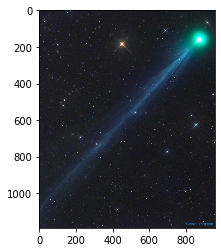

In [37]:

import requests
import json
import IPython
from matplotlib import pyplot as plt
from io import BytesIO
from PIL import Image

import warnings; warnings.simplefilter('ignore')

def parse_response(response):
    data = None
    if response.status_code == 200:
        # Data is formatted as JSON but received as string. Load it as JSON object
        data = json.loads(response.content)        
    
    # Raise an error otherwise    
    else:
        raise Exception("Unexpected response (%s: %s)." %(response.status_code, response.reason))
    
    return data


def get_imatge_nasa(api_key):
    # Query the data from the API
    base_url ='https://api.nasa.gov/planetary/apod?api_key=%s'

    # We also add the API KEY to the request
    response = requests.get(base_url % (api_key))
    
    # Check the response code and act accordingly
    data = parse_response(response)
    
    data

    return (data)

# Enter API key
api_key = 'bQJQycsl4rnab8n2uUFZrDGszZb8t2GlteAsMcOO'
data = get_imatge_nasa(api_key)

#Opción A: Primero comprobamos que el archivo corresponde a una imagen.
#Después, el contenido de la imagen mediante matplotlib

if data['media_type'] == "image": 
    tmp=requests.get(data.get('url'))
    img= Image.open(BytesIO(tmp.content))
    plt.imshow(img)
    plt.show()
else:
    print("Media Type (%s)." %(data['media_type']))  

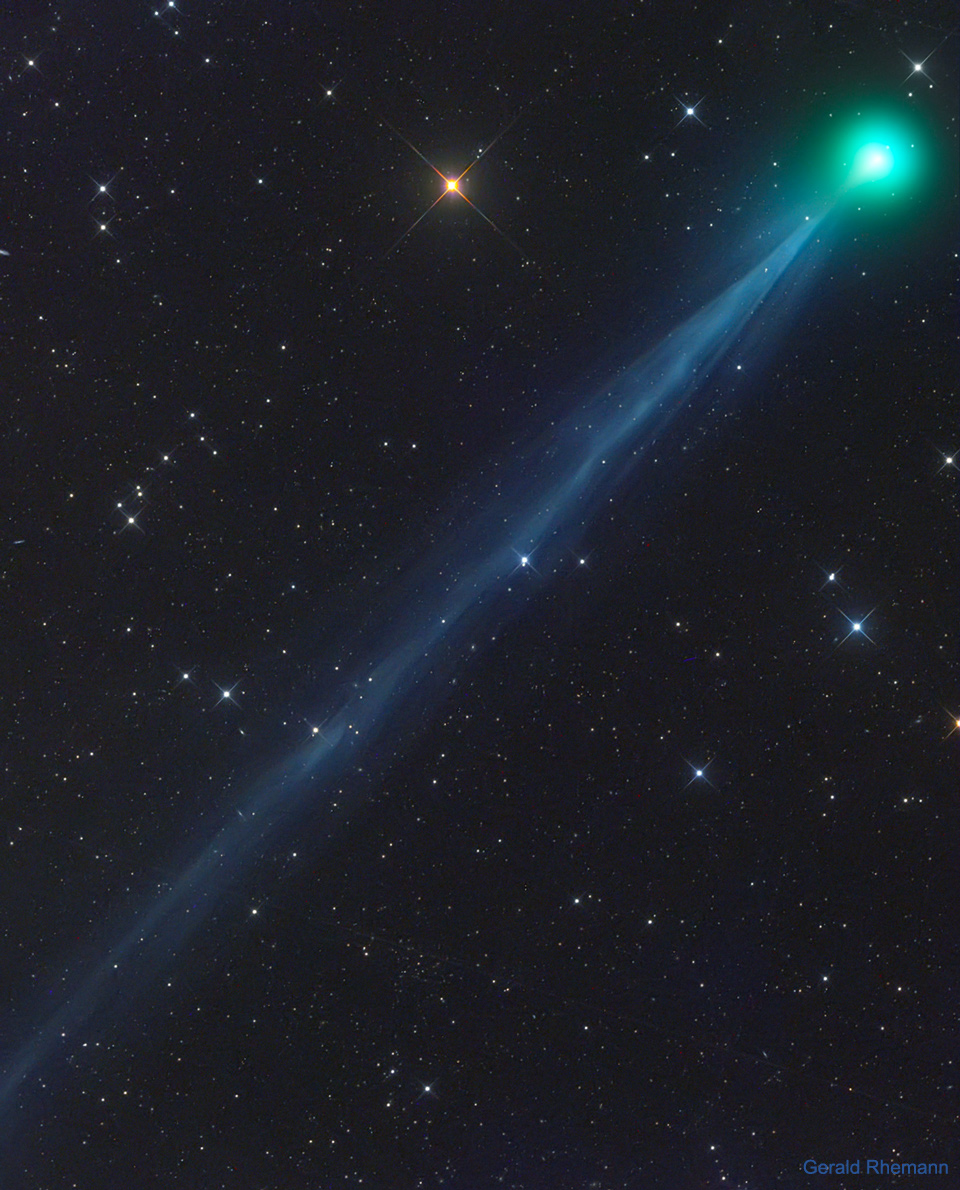

In [38]:
#Opción B: Utilizamos IPython para visualizar la imagen

if data['media_type'] == "image":
    
    img=IPython.display.Image(data.get('url'))

else:

    img="Media Type (%s)" %(data['media_type'])

img

### Ejercicio 5

Queremos conocer la Agenda de actos de  la Anella Olímpica de la ciudad de Barcelona.  Imprimid por pantalla el nombre del grupo o cantante que celebrará un concierto en la Anella Olímpica durante el año 2020.  Para realizar el ejercicio, consultad el portal de datos abiertos del Ayuntamiento de Barcelona mediante la siguiente [url](https://opendata-ajuntament.barcelona.cat/es/).  Primero tenéis que identificar qué métode utilizar para descargar los datos. Seguidamente, descargad los datos y procesarlos para responder la pregunta. 

**Respuesta**

In [39]:
#Consultad la url y descargad los datos "actosanella.json"
# En el path donde se han guardado los datos
import json

#Cargamos los datos
with open ('data/actosanella.json') as json_data:
    data=json.load(json_data)

#Seleccionamos categoría "actes"
data2 = data['actes']
      
for tmp in data2['acte']:

#Aplicamos un condicional para seleccionar los conciertos del 2020
        if tmp['date'][0:4] == '2020' and tmp['acte_type'] == 'Concierto':
            
                print(tmp['name'])
    

Bon Iver
Fangoria
Pablo López
Dua Lipa
Maldita Nerea
David Bisbal
Carlos Sadness
Werq the World - Ru Paul's Drag Race
Beret
Manuel Carrasco
Paul McCartney
OT 2020
Camila Cabello
Alicia Keys
Iron Maiden
Tash Sultana
Doctor Queen
Morat
Maluma
Elton John 2/10/2020
The 1975
Elton John 3/10/2020
Helloween
Alanis Morissette
Leiva
Dani Martín
Dani Martín
Natos y Waor
Niall Horan
Nil Moliner
Bad Gyal
Alejandro Fernández
